# Tasca M5 T01
Exercicis d'Hipotesis Testing
## Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i
digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("/Formación/2022 BarcelonaActiva/CursDSOnline/sprint05_Test_hipotesi_i_machine_learning/Lligues europees UEFA.csv", encoding="latin1") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 1 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper  98 non-null     object
dtypes: object(1)
memory usage: 912.0+ bytes


In [3]:
df.head()

,Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper
0,1;Manchester City;ENG;1;37;28;6;3;96;24;72;90;...
1,2;Liverpool;ENG;2;36;26;8;2;89;24;65;86;2.39;8...
2,3;Real Madrid;ESP;1;37;26;7;4;80;31;49;85;2.3;...
3,4;Bayern Munich;GER;1;34;24;5;5;97;37;60;77;2....
4,5;Paris S-G;FRA;1;37;25;8;4;85;36;49;83;2.24;7...


In [4]:
#Arreglo el dataframe separant les sèries i posant la columna "RK" com a index.
dfFix = pd.read_csv("/Formación/2022 BarcelonaActiva/CursDSOnline/sprint05_Test_hipotesi_i_machine_learning/Lligues europees UEFA.csv", sep=';', encoding="latin1", index_col="Rk")
dfFix.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [5]:
dfFix["Squad"].describe()

count                  98
unique                 98
top       Manchester City
freq                    1
Name: Squad, dtype: object

In [5]:
#Per fer un mostreig aleatori del dataframe.
#dfFix.sample(frac=0.5)

In [30]:
#Aplico condició booleana a la columna Country.
#dfCondition = dfFix['Country'] == "ENG"
#dfCondition

Rk
1      True
2      True
3     False
4     False
5     False
      ...  
94    False
95    False
96     True
97     True
98    False
Name: Country, Length: 98, dtype: bool

In [6]:
#Filtro per mostrar només els valors del Country igual a ENG i creo un nou dataframe. 
dfEng = dfFix[dfFix["Country"] == "ENG"]
dfEng

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
11,Chelsea,ENG,3,36,20,10,6,73,31,42,70,1.94,63.2,34.9,28.4,0.79,W D L D W,36991,Mason Mount - 11,Edouard Mendy
15,Tottenham,ENG,4,37,21,5,11,64,40,24,68,1.84,61.5,39.0,22.5,0.61,D W D W W,56234,Son Heung-min - 21,Hugo Lloris
18,Arsenal,ENG,5,36,21,3,12,56,45,11,66,1.83,56.3,44.0,12.2,0.34,W W W W L,59636,Bukayo Saka - 11,Aaron Ramsdale
34,Manchester Utd,ENG,6,37,16,10,11,57,56,1,58,1.57,53.9,54.3,-0.4,-0.01,L L D W L,73150,Cristiano Ronaldo - 18,David de Gea
37,West Ham,ENG,7,37,16,8,13,59,48,11,56,1.51,49.8,49.4,0.4,0.01,D L L W D,58370,Jarrod Bowen - 12,?ukasz Fabia?ski
42,Wolves,ENG,8,37,15,6,16,37,40,-3,51,1.38,34.8,57.0,-22.2,-0.60,L L D L D,30777,Raúl Jiménez - 6,José Sá
47,Leicester City,ENG,9,36,13,9,14,57,57,0,48,1.33,48.5,58.2,-9.7,-0.27,D L L W W,32521,Jamie Vardy - 14,Kasper Schmeichel


En aquesta temporada els equips de la lliga anglesa han superat les 17 victòries (sèrie W) de mitjana, que és el valor promig de les darreres 3 temporades. Per tant, estableixo: 
- Hipòtesi nul·la. El fet acceptat que la mitjana de victòries dels equips de la lliga anglesa és 17, per tant: Ho: mu = 17.
- Hipòtesi alternativa. L'afirmació és que els equips anglesos tenen victòries per sobre del valor promig, és a dir: H1: mu > 17.


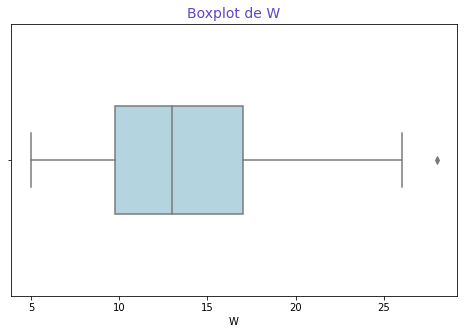

In [7]:
#Primer miro el tipus de distribució de W (victòries).

plt.figure(figsize =(8, 5))
sns.boxplot(data=dfEng, x='W', color="lightblue", width=.4)
plt.title("Boxplot de W", fontsize=14, color="#6146C5", alpha=1)
plt.show()

<AxesSubplot:xlabel='W', ylabel='Density'>

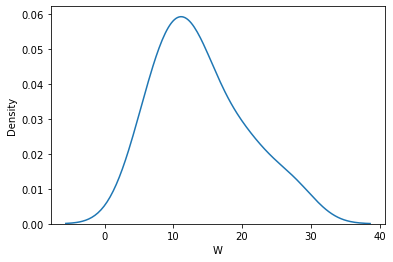

In [8]:
#Faig un gràfic de densitat per visualitzar el problema.

sns.kdeplot(data=dfEng, x="W")

In [9]:
#Realitzo la prova t de Student.

mu = 17
data = dfEng["W"]

#Calculo valors estadístics de la mostra.
n = len(data)
mean = np.mean(data)
dsvSt = np.array(data).std(ddof=1) #n-1 graus de llibertat
errorSt = dsvSt / np.sqrt(n)
print("n = {0}\nmitjana = {1}\ndesviació estàndard = {2}\nerror estàndard = {3}".format(n, mean, dsvSt, errorSt))

n = 20
mitjana = 13.95
desviació estàndard = 6.452049857868509
error estàndard = 1.4427222076411843


Aplico la fòrmula t de Student per calcular el valor de t per mu = 17

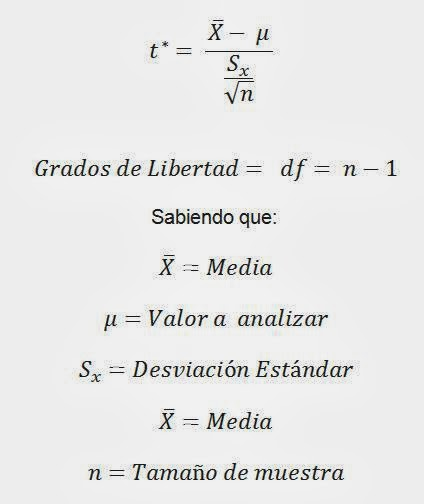

In [10]:
t = (mean - mu) / errorSt
t

-2.11405909179611

In [11]:
#Amb scipy podem calcular el valor P que ens dirà el risc que asumim si refutem la hipòtesi nula.
stats.t.cdf(t, df=n-1)

0.02397923894714013

### Conclusió
El valor P obtingut (0,02) és menor al nivell de significància establert (alpha=0,05), per tant hi ha evidències per refutar la hipòtesi nul·la a favor de l'alternativa. Es pot concloure que els equips anglesos en aquesta temporada acumulen un nombre de victòries superior a la mitjana, 17.



## Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Per l'excercici plantejo la hipòtesi que quanta més afició (Attendance) té un equip, més punts acumula.
Així doncs la nostra hipòtesi és:

- Hipòtesi nul·la, H0: les dues mostres són independents. No hi ha relació entre l'afició i els punts.
- Hipòtesi alternativa, H1: existeix una dependència entre les dues mostres, l'afició i els punts acumulats.

In [12]:
# Creo un nou dataframe per a tots els equips i on es veuen les dades a comparar, Attendance i Pts.

dfPts=dfFix[["Squad","Attendance", "Pts"]]
dfPts.head()

,Squad,Attendance,Pts
Rk,,,
1,Manchester City,52739,90
2,Liverpool,53367,86
3,Real Madrid,40624,85
4,Bayern Munich,33176,77
5,Paris S-G,41188,83


In [13]:
# Faig la prova de correlació de Pearson.
from scipy.stats import pearsonr

data1 = dfPts["Attendance"]
data2 = dfPts["Pts"]
stat, p = pearsonr(data1, data2)
print("stat = %.3f\np = %.3f" % (stat, p))
if p > 0.05:
   print('Probablement independent')
else:
   print('Probablement dependent')

stat = 0.579
p = 0.000
Probablement dependent


### Conclusió
Amb una probabilitat de 0% (agafant un nivell de significança alfa de 5%) hi ha suficients garanties per descartar la hipòtesi nul·la i considerar que les variables són dependents.
Conclueixo que l'afició d'un equip té influència en els punts guanyats.